## Import Library yang digunakan


In [1]:
# Importing the required libraries
import pandas as pd, numpy as np
import matplotlib.pyplot as plt, seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

# Importing required packages for visualization
from IPython.display import Image
from six import StringIO
from sklearn.tree import export_graphviz
import pydotplus, graphviz

from sklearn.metrics import confusion_matrix, accuracy_score

In [2]:
df=pd.read_csv("Jantungafteroutlier.csv")
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,20.34,0,0,1,0,0,0,1,13,1,0,1,2,7,0,0,0
1,0,26.58,1,0,0,20,30,0,0,10,1,1,1,4,8,1,0,0
2,0,23.71,0,0,0,28,0,1,1,5,1,0,1,2,8,0,0,0
3,1,28.87,1,0,0,6,0,1,1,12,2,0,0,4,12,0,0,0
4,0,31.64,1,0,0,5,0,1,1,13,1,1,0,3,9,1,0,0


In [3]:
print ("Data Shape: ", df.shape)

Data Shape:  (289976, 18)


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 289976 entries, 0 to 289975
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      289976 non-null  int64  
 1   BMI               289976 non-null  float64
 2   Smoking           289976 non-null  int64  
 3   AlcoholDrinking   289976 non-null  int64  
 4   Stroke            289976 non-null  int64  
 5   PhysicalHealth    289976 non-null  int64  
 6   MentalHealth      289976 non-null  int64  
 7   DiffWalking       289976 non-null  int64  
 8   Sex               289976 non-null  int64  
 9   AgeCategory       289976 non-null  int64  
 10  Race              289976 non-null  int64  
 11  Diabetic          289976 non-null  int64  
 12  PhysicalActivity  289976 non-null  int64  
 13  GenHealth         289976 non-null  int64  
 14  SleepTime         289976 non-null  int64  
 15  Asthma            289976 non-null  int64  
 16  KidneyDisease     28

In [5]:
df.duplicated().sum()

17551

In [6]:
df.isnull().sum()

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

In [7]:
# Putting feature variable to X
X = df.drop('HeartDisease',axis=1)

# Putting response variable to y
y = df['HeartDisease']

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

C:\Users\M S I\AppData\Local\Temp\ipykernel_23316\750632785.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='HeartDisease',data=df, palette='pastel')


<Axes: xlabel='HeartDisease', ylabel='count'>

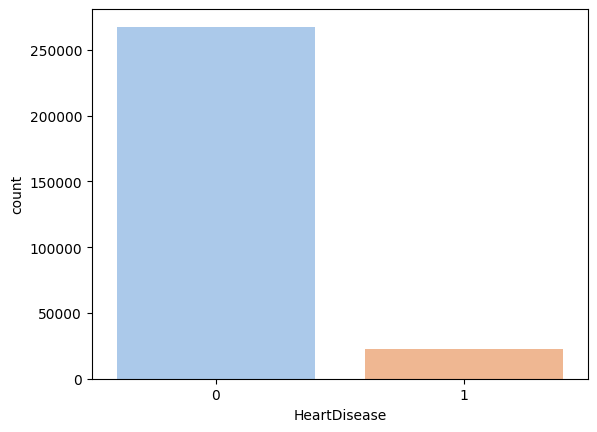

In [9]:
#undersampling, mengecek jumlah sebaran data target
sns.countplot(x='HeartDisease',data=df, palette='pastel')

In [10]:
import pandas as pd
from imblearn.under_sampling import RandomUnderSampler


# Separate features and target
X = df.drop('HeartDisease', axis=1)  # Replace 'target_column' with your target column name
y = df['HeartDisease']

# Create an undersampler object
rus = RandomUnderSampler(random_state=42)

# Fit and apply undersampling to the data
X_resampled, y_resampled = rus.fit_resample(X, y)

# Create a new DataFrame with the undersampled data
undersampled_data = pd.DataFrame(X_resampled, columns=X.columns)
undersampled_data['HeartDisease'] = y_resampled

# Print the class distribution in the undersampled data
print(undersampled_data['HeartDisease'].value_counts())

HeartDisease
0    22393
1    22393
Name: count, dtype: int64


In [11]:
x = df.drop(['HeartDisease'],axis=1) # x nya adalah atribut yang mempengaruhi penyakit jantung
y = df['HeartDisease'] # y nya adalah label itu sendiri

In [12]:
# sebelum undersampling
print(x.shape)
print(y.shape)

(289976, 17)
(289976,)


In [13]:
# jumlah data setelah dilakukan undersampling
print(X_resampled.shape)
print(y_resampled.shape)

(44786, 17)
(44786,)


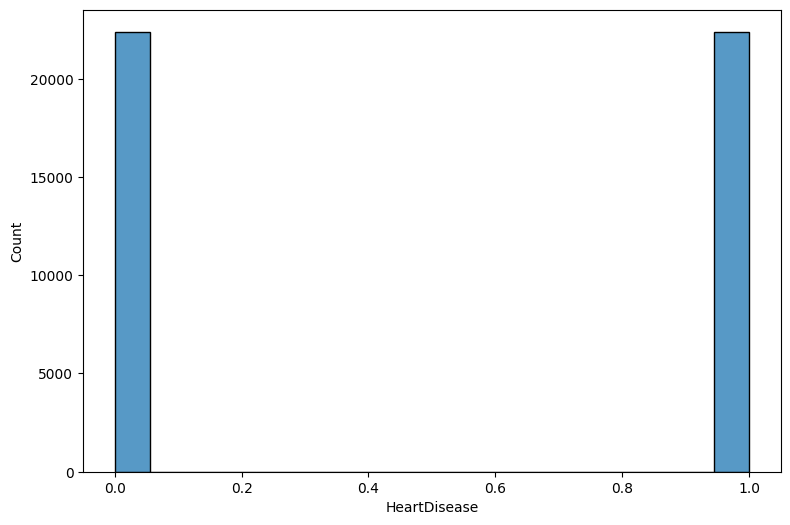

In [14]:
fig = plt.subplots(figsize=(9,6))
sns.histplot(data=y_resampled)
plt.show()


In [15]:
from sklearn.model_selection import train_test_split

#  X_resampled adalah fitur dan y_resampled adalah target hasil undersampling
# Membagi data menjadi 80% training dan 20% testing
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled
)

# Verifikasi bentuk data setelah split
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)


Shape of X_train: (35828, 17)
Shape of X_test: (8958, 17)
Shape of y_train: (35828,)
Shape of y_test: (8958,)


In [16]:
#creating a decision tree classifier model

model = DecisionTreeClassifier()

In [17]:
#fitting the model

model.fit(X_train, y_train)

DecisionTreeClassifier()

In [18]:
#model prediction

model.predict(X_test)

array([0, 1, 0, ..., 0, 1, 0], dtype=int64)

In [19]:
#subset model test accuracy

model.score(X_test,y_test)

0.672025005581603

In [20]:
#subset model train accuracy

model.score(X_train,y_train)

0.9973763536898516

In [21]:
# Membuat model Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)

In [22]:
# Melakukan k-fold cross-validation
from sklearn.model_selection import cross_val_score
k_fold = 10  # Misalnya 5-fold
cv_scores = cross_val_score(dt_model, X_train, y_train, cv=k_fold, scoring='accuracy')

print(f"K-Fold Cross-Validation Scores: {cv_scores}")
print(f"Average CV Accuracy: {cv_scores.mean()}")

K-Fold Cross-Validation Scores: [0.67401619 0.68406363 0.68322635 0.67596986 0.68294725 0.66452693
 0.66703879 0.68518002 0.68509213 0.67085427]
Average CV Accuracy: 0.6772915419033955


In [23]:
# Melatih model  
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [26]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
# Evaluasi model pada data uji
y_pred = dt_model.predict(X_test)

print("Accuracy on Test Set:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy on Test Set: 0.6714668452779639
Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.68      0.67      4479
           1       0.67      0.67      0.67      4479

    accuracy                           0.67      8958
   macro avg       0.67      0.67      0.67      8958
weighted avg       0.67      0.67      0.67      8958

Confusion Matrix:
[[3030 1449]
 [1494 2985]]


In [27]:
# Import libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Definisikan parameter grid untuk Decision Tree
param_grid = {
    'criterion': ['gini', 'entropy'],                # Fungsi impurity
    'max_depth': [3, 5, 10, None],                   # Kedalaman maksimum tree
    'min_samples_split': [2, 5, 10],                 # Minimum jumlah sampel untuk split
    'min_samples_leaf': [1, 2, 5],                   # Minimum jumlah sampel di leaf node
    'max_features': [None, 'sqrt', 'log2']           # Fitur yang dipertimbangkan di setiap split
}

# Inisialisasi model Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)

# GridSearchCV untuk hyperparameter tuning
grid_search = GridSearchCV(
    estimator=dt_model, 
    param_grid=param_grid, 
    scoring='accuracy', 
    cv=5,  # 5-fold cross-validation
    n_jobs=-1,  # Gunakan semua core untuk parallel processing
    verbose=1
)

# Fit GridSearchCV pada data latih (resampled)
grid_search.fit(X_train, y_train)

# Tampilkan hasil terbaik
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Accuracy:", grid_search.best_score_)

# Gunakan model terbaik untuk prediksi pada data uji
best_dt_model = grid_search.best_estimator_
y_pred = best_dt_model.predict(X_test)

# Evaluasi performa model terbaik
print("Accuracy on Test Set:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Best Parameters: {'criterion': 'entropy', 'max_depth': 10, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 5}
Best Cross-Validation Accuracy: 0.7547728193868892
Accuracy on Test Set: 0.7505023442732753
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.68      0.73      4479
           1       0.72      0.82      0.77      4479

    accuracy                           0.75      8958
   macro avg       0.76      0.75      0.75      8958
weighted avg       0.76      0.75      0.75      8958

Confusion Matrix:
[[3063 1416]
 [ 819 3660]]


In [28]:
# Gunakan model terbaik dari GridSearchCV
final_model = grid_search.best_estimator_

# Latih model dengan data latih yang sudah di-undersample
final_model.fit(X_train, y_train)

# Prediksi pada data uji
y_final_pred = final_model.predict(X_test)

# Evaluasi performa model pada data uji
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print("Final Model Accuracy on Test Set:", accuracy_score(y_test, y_final_pred))
print("Classification Report:")
print(classification_report(y_test, y_final_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_final_pred))


Final Model Accuracy on Test Set: 0.7505023442732753
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.68      0.73      4479
           1       0.72      0.82      0.77      4479

    accuracy                           0.75      8958
   macro avg       0.76      0.75      0.75      8958
weighted avg       0.76      0.75      0.75      8958

Confusion Matrix:
[[3063 1416]
 [ 819 3660]]


In [29]:
import pickle

# Simpan model
with open('final_dt-undersampling.pkl', 'wb') as f:
    pickle.dump(final_model, f)



In [34]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

dtc = DecisionTreeClassifier (
    ccp_alpha=0.0, class_weight=None, criterion='entropy', 
    max_depth=4, max_features=None, max_leaf_nodes=None,
    min_impurity_decrease=0.0, min_samples_leaf=1,
    min_samples_split=2, min_weight_fraction_leaf=0.0,
    random_state=42, splitter='best'
)

model = dtc.fit(X_train, y_train)

dtc_acc = accuracy_score(y_test, dtc.predict(X_test))

print(f"akurasi data training = {accuracy_score(y_train, dtc.predict(X_train))}")
print(f"akurasi data testing = {dtc_acc} \n")

print(f"confusion matrix : \n{confusion_matrix(y_test, dtc.predict(X_test))}\n")
confusion = confusion_matrix(y_test, dtc.predict(X_test))
tn, fp, fn, tp = confusion.ravel()
print(f"classification report : \n {classification_report(y_test, dtc.predict(X_test))}")

akurasi data training = 0.7461761750586133
akurasi data testing = 0.7457021656619781 

confusion matrix : 
[[2972 1507]
 [ 771 3708]]

classification report : 
               precision    recall  f1-score   support

           0       0.79      0.66      0.72      4479
           1       0.71      0.83      0.77      4479

    accuracy                           0.75      8958
   macro avg       0.75      0.75      0.74      8958
weighted avg       0.75      0.75      0.74      8958



In [35]:
# tuning dengan undersampling
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report

# Inisialisasi model Decision Tree
dt = DecisionTreeClassifier(random_state=42)

# Definisi parameter grid
param_grid = {
    'criterion': ['gini', 'entropy'],  # Kriteria pembagian
    'max_depth': [None, 5, 10, 20, 30],  # Kedalaman maksimum
    'min_samples_split': [2, 5, 10],  # Jumlah minimum sampel untuk split
    'min_samples_leaf': [1, 2, 4],  # Jumlah minimum sampel di daun
}

# Inisialisasi GridSearchCV
grid = GridSearchCV(estimator=dt, param_grid=param_grid, 
                    scoring='accuracy', verbose=2, n_jobs=-1)

# Melatih GridSearchCV pada data pelatihan
grid.fit(X_train, y_train)

# Menampilkan parameter terbaik
print("Best Parameters:", grid.best_params_)

# Evaluasi model terbaik pada data uji
best_model = grid.best_estimator_
y_pred = best_model.predict(X_test)

# Laporan hasil
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))


Fitting 5 folds for each of 90 candidates, totalling 450 fits


Best Parameters: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5}
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.68      0.73      4479
           1       0.72      0.82      0.77      4479

    accuracy                           0.75      8958
   macro avg       0.76      0.75      0.75      8958
weighted avg       0.76      0.75      0.75      8958

Accuracy: 0.7505023442732753


In [36]:
dt = DecisionTreeClassifier(max_depth=5)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5)

In [38]:
# tuning dengan undersampling
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report

# Inisialisasi model Decision Tree
dt = DecisionTreeClassifier(random_state=42)

# Definisi parameter grid
param_grid = {
    'criterion': ['gini', 'entropy'],  # Kriteria pembagian
    'max_depth': [None, 5, 10, 20, 30],  # Kedalaman maksimum
    'min_samples_split': [2, 5, 10],  # Jumlah minimum sampel untuk split
    'min_samples_leaf': [1, 2, 4],  # Jumlah minimum sampel di daun
}

# Inisialisasi GridSearchCV
grid = GridSearchCV(estimator=dt, param_grid=param_grid, 
                    scoring='accuracy', cv=5, verbose=2, n_jobs=-1)

# Melatih GridSearchCV pada data pelatihan
grid.fit(X_train, y_train)

# Menampilkan parameter terbaik
print("Best Parameters:", grid.best_params_)

# Evaluasi model terbaik pada data uji
best_model = grid.best_estimator_
y_pred = best_model.predict(X_test)

# Laporan hasil
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))


Fitting 5 folds for each of 90 candidates, totalling 450 fits
Best Parameters: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5}
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.68      0.73      4479
           1       0.72      0.82      0.77      4479

    accuracy                           0.75      8958
   macro avg       0.76      0.75      0.75      8958
weighted avg       0.76      0.75      0.75      8958

Accuracy: 0.7505023442732753


In [40]:
## kode dengan undersampling langsung k-fold
# Import library yang dibutuhkan
import numpy as np
import pandas as pd
from sklearn.model_selection import KFold, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from imblearn.under_sampling import RandomUnderSampler

# Membagi dataset resampled menjadi train dan test set (90% train, 10% test)
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Melakukan undersampling pada dataset
undersampler = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = undersampler.fit_resample(X, y)

# Inisialisasi KFold dengan k=10
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Inisialisasi model Decision Tree
dt = DecisionTreeClassifier(random_state=42)

# List untuk menyimpan metrik
accuracies = []

# Melakukan K-Fold Cross-Validation
for train_index, test_index in kf.split(X_resampled):
    # Menggunakan .iloc untuk mengakses baris berdasarkan indeks
    X_train, X_test = X_resampled.iloc[train_index], X_resampled.iloc[test_index]
    y_train, y_test = y_resampled.iloc[train_index], y_resampled.iloc[test_index]
    
    # Train the model
    dt.fit(X_train, y_train)
    
    # Make predictions
    y_pred = dt.predict(X_test)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)
    
    # Print classification report for each fold
    print(f"Fold {len(accuracies)}")
    print(classification_report(y_test, y_pred))
    print(f"Accuracy: {accuracy:.2f}")
    print("")

# Calculate the mean accuracy across all folds
mean_accuracy = np.mean(accuracies)
print(f"Mean Accuracy: {mean_accuracy:.2f}")

# Optional: Using cross_val_score for a simpler approach
scores = cross_val_score(dt, X_resampled, y_resampled, cv=kf)
print(f"Cross-Validation Accuracy Scores: {scores}")
print(f"Mean Cross-Validation Accuracy: {scores.mean():.2f}")

Fold 1
              precision    recall  f1-score   support

           0       0.67      0.68      0.67      2255
           1       0.67      0.66      0.66      2224

    accuracy                           0.67      4479
   macro avg       0.67      0.67      0.67      4479
weighted avg       0.67      0.67      0.67      4479

Accuracy: 0.67

Fold 2
              precision    recall  f1-score   support

           0       0.67      0.68      0.67      2244
           1       0.67      0.66      0.66      2235

    accuracy                           0.67      4479
   macro avg       0.67      0.67      0.67      4479
weighted avg       0.67      0.67      0.67      4479

Accuracy: 0.67

Fold 3
              precision    recall  f1-score   support

           0       0.67      0.69      0.68      2236
           1       0.68      0.66      0.67      2243

    accuracy                           0.68      4479
   macro avg       0.68      0.68      0.68      4479
weighted avg       0.

In [41]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# Inisialisasi model Decision Tree
dt = DecisionTreeClassifier()

# Tentukan ruang hyperparameter
param_dist = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt', 'log2'],         # Metode pembagian node
}

# Inisialisasi RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=dt,
    param_distributions=param_dist,
    n_iter=50,  # Jumlah kombinasi yang diuji
    cv=5,       # Jumlah fold untuk cross-validation
    scoring='accuracy',  # Metrik evaluasi
    random_state=42,
    n_jobs=-1  # Gunakan semua core CPU yang tersedia
)

# Fit RandomizedSearch ke data
random_search.fit(X_train, y_train)

# Hasil hyperparameter terbaik
print("Best parameters found:", random_search.best_params_)
print("Best cross-validation accuracy:", random_search.best_score_)

Best parameters found: {'splitter': 'random', 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': None, 'max_depth': 10, 'criterion': 'entropy'}
Best cross-validation accuracy: 0.7540438231912577


Accuracy: 0.7724
Precision: 0.7347
Recall: 0.8531
F1-Score: 0.7895
ROC-AUC: 0.8410

Confusion Matrix:
[[1548  690]
 [ 329 1911]]

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.69      0.75      2238
           1       0.73      0.85      0.79      2240

    accuracy                           0.77      4478
   macro avg       0.78      0.77      0.77      4478
weighted avg       0.78      0.77      0.77      4478



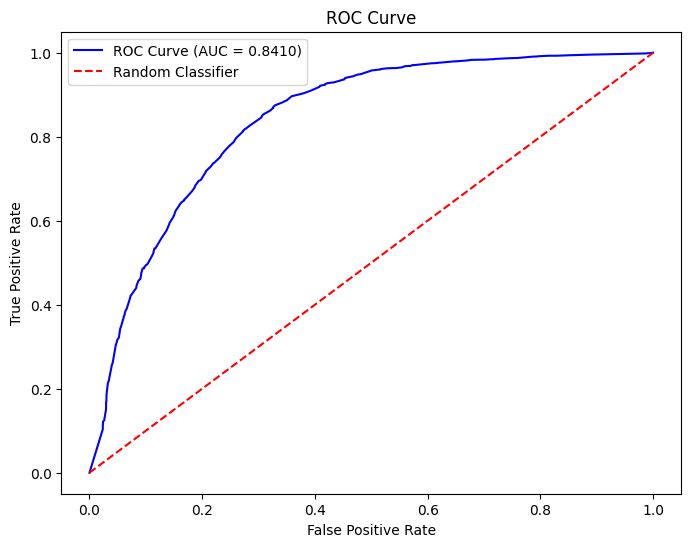

In [42]:
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    roc_auc_score,
    roc_curve,
    classification_report
)
import matplotlib.pyplot as plt

# Prediksi pada data uji
y_pred = final_model.predict(X_test)

# Hitung metrik evaluasi
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, final_model.predict_proba(X_test)[:, 1])

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"ROC-AUC: {roc_auc:.4f}")

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(cm)

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, final_model.predict_proba(X_test)[:, 1])

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


In [45]:
import pickle
from sklearn.svm import SVC

In [46]:
# Simpan model ke file .pkl
with open('decisionTree-Undersampling.pkl', 'wb') as file:
    pickle.dump(dt_model, file)

print("Model Decision Tree berhasil disimpan sebagai decisionTree-Undersampling.pkl")


Model Decision Tree berhasil disimpan sebagai decisionTree-Undersampling.pkl


In [56]:
#memastikan model yang sudah dilatih sebelumnya disimpan kedalam model file .pkl, untuk memastikan model tersebut sudah dilatih menggunakan fit.
from sklearn.tree import DecisionTreeClassifier
import pickle

# Melatih model
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)  # Pastikan X_train dan y_train tersedia

# Menyimpan model yang sudah dilatih
with open('decisionTree-Undersampling.pkl', 'wb') as file:
    pickle.dump(dt, file)


In [57]:
#mengecek apakah file .pkl sudah benar terisi model yang sudah dilatih
with open('decisionTree-Undersampling.pkl', 'rb') as file:
    loaded_dt_model = pickle.load(file)

# Periksa apakah model sudah dilatih
print(hasattr(loaded_dt_model, "tree_"))  # Harus True jika model sudah dilatih


True


## melakukan debugging

In [52]:
#memeriksa apakah file .pkl ada
import os
print(os.path.exists('decisionTree-Undersampling.pkl'))


True


In [53]:
#memeriksa tipe objek dalam file
with open('decisionTree-Undersampling.pkl', 'rb') as file:
    obj = pickle.load(file)
print(type(obj))


<class 'sklearn.tree._classes.DecisionTreeClassifier'>


In [54]:
#memeriksa kolom x_test sudah sesuai
print(X_test.columns == X_train.columns)  # Harus True
print(X_test.shape)  # Cocok dengan jumlah fitur model


[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True]
(4478, 17)


In [58]:
# Periksa tipe model
print(type(loaded_dt_model))

# Jika model valid, cetak detail model
print(loaded_dt_model)

# Pastikan X_test sesuai
print(X_test.shape)  # Harus cocok dengan jumlah fitur saat melatih


<class 'sklearn.tree._classes.DecisionTreeClassifier'>
DecisionTreeClassifier(random_state=42)
(4478, 17)


In [59]:
from sklearn.tree import DecisionTreeClassifier
import pickle

# Melatih model
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)  # Gunakan data training Anda

# Menyimpan model yang sudah dilatih ke file
with open('decisionTree-Undersampling.pkl', 'wb') as file:
    pickle.dump(dt, file)


In [60]:
# Muat model
with open('decisionTree-Undersampling.pkl', 'rb') as file:
    loaded_dt_model = pickle.load(file)

# Prediksi menggunakan model
predictions = loaded_dt_model.predict(X_test)
print("Prediksi:", predictions)


Prediksi: [0 0 0 ... 1 0 1]
